# Usecase 1 - Selecting cells from a circuit

A circuit is composed of multiple files containing the neural network topology and properties. These files are the cell files and the connectome files. In this notebook, we will only discuss the cell file exploration using `bluepy`. 

More precisely, we will look at how to load a circuit and select specific neurons. 

For more generic information about `bluepy` installation and more, please refer to the [documentation](https://bbpteam.epfl.ch/documentation/projects/bluepy/latest/index.html).

## Loading a circuit
The first step is to import the `Circuit` class from bluepy:

In [1]:
from bluepy import Circuit

Then we need to load a circuit using the `Circuit` class.
For pedagogic purposes, we specify the BlueConfig path in the `circuit_path` variable. 

In [2]:
circuit_path = "/gpfs/bbp.cscs.ch/project/proj12/NSE/bluepy/circuits/CA1.O1/mooc-circuit/CircuitConfig"
circuit = Circuit(circuit_path)

The `circuit_path` is a path to a BlueConfig file (documentation about the blueconfig can be found [here](https://sonata-extension.readthedocs.io/en/latest/blueconfig.html)). This BlueConfig file contains all the different files or directories composing a neuronal circuit.


## Accessing the neurons ids and properties

To access all the neuron information from `bluepy`, one can use the `circuit.cells` API.

In [3]:
circuit.cells

This is the global accessor for all the neurons from the circuit.

### GIDs

A circuit contains neurons, which are numbered by their unique global identifier (GID). This concept is closely related to the NEURON simulator and are 1-based integers (the first GID is always 1).

In [4]:
cell_ids = circuit.cells.ids()
print(cell_ids)
print("Total number of cells in circuit: {}".format(len(cell_ids)))

[    1     2     3 ... 18196 18197 18198]
Total number of cells in circuit: 18198


### Properties

In the circuit, each neuron has properties attached to it. These properties are computed during the circuit creation and are stored inside the cell file. Bluepy can give access to these variables.


#### Accessing the names of the stored properties
From circuit to circuit the attached properties can fluctuate (due to different versions of the circuit-building for example). In order to find the available properties for your current circuit, you can use the `circuit.cells.available_properties` API.

In [5]:
available_properties = circuit.cells.available_properties
for prop in sorted(available_properties):
    print(prop)

@dynamics:holding_current
@dynamics:threshold_current
etype
layer
model_template
model_type
morph_class
morphology
mtype
orientation
region
rotation_angle_xaxis
rotation_angle_yaxis
rotation_angle_zaxis
synapse_class
x
y
z


#### Retrieving values of properties

We now know which variables are present in this circuit. We can finally collect the values of the different properties  for each neurons using the `circuit.cells.get` API. 

---
**NOTE**

The get API uses a cached object containing all the cell information. This means the first access to the `.get` is much slower than all the next ones.

---
    

You can access: 
- a single property from the cell data using the name of the property:

In [6]:
etypes = circuit.cells.get(properties="etype")

This returns a pandas `Series` with the cell GIDs as index.

In [7]:
etypes

1         bAC
2         bAC
3         bAC
4         cAC
5         cAC
         ... 
18194    cNAC
18195    cNAC
18196    cNAC
18197    cNAC
18198    cNAC
Name: etype, Length: 18198, dtype: category
Categories (4, object): ['bAC', 'cAC', 'cACpyr', 'cNAC']

- multiple properties at the same time:

In [8]:
properties = circuit.cells.get(properties=["etype", "region"])

In [9]:
properties

,etype,region
1,bAC,mc5;SLM
2,bAC,mc3;SLM
3,bAC,mc6;SLM
4,cAC,mc5;SR
5,cAC,mc5;SR
...,...,...
18194,cNAC,mc3;SO
18195,cNAC,mc3;SO
18196,cNAC,mc0;SO
18197,cNAC,mc4;SO


- or even all properties:

In [10]:
properties = circuit.cells.get()
properties.head()

,etype,layer,model_template,model_type,morph_class,morphology,mtype,region,rotation_angle_xaxis,rotation_angle_yaxis,rotation_angle_zaxis,synapse_class,x,y,z,@dynamics:holding_current,@dynamics:threshold_current,orientation
1,bAC,SLM,hoc:CA1_int_bAC_011127HP1_2019032911561,biophysical,INT,011127HP1_-_Scale_x1.000_y0.850_z1.000,SLM_PPA,mc5;SLM,-0.000000,0.306704,-0.000000,INH,409.446689,525.218483,1074.146619,0.028962,0.224609,"[[0.9533337806844938, 0.0, 0.30191837076569117..."
2,bAC,SLM,hoc:CA1_int_bAC_011127HP1_2019032911561,biophysical,INT,011127HP1_-_Scale_x1.000_y0.850_z1.000,SLM_PPA,mc3;SLM,-3.141593,1.051681,-3.141593,INH,692.961402,511.187277,573.179832,0.028962,0.224609,"[[-0.4961126176694474, 6.075627292455034e-17, ..."
3,bAC,SLM,hoc:CA1_int_bAC_011127HP1_2019032911561,biophysical,INT,011127HP1_-_Scale_x1.000_y0.850_z1.000,SLM_PPA,mc6;SLM,-3.141593,1.393882,-3.141593,INH,624.142630,520.641475,976.924721,0.028962,0.224609,"[[-0.1759926666818469, 2.1552885592533084e-17,..."
4,cAC,SR,hoc:CA1_int_cAC_990611HP2_2019032816214,biophysical,INT,990611HP2,SR_SCA,mc5;SR,-3.141593,0.347655,-3.141593,INH,430.543380,411.999965,1180.185218,0.005140,0.341797,"[[-0.9401740722181569, 1.1513811681832984e-16,..."
5,cAC,SR,hoc:CA1_int_cAC_990611HP2_2019032816214,biophysical,INT,990611HP2_-_Scale_x1.000_y1.050_z1.000,SR_SCA,mc5;SR,-0.000000,0.137277,-0.000000,INH,427.936977,302.239247,1013.453517,0.004947,0.341797,"[[0.990592293136912, 0.0, 0.13684629617842906]..."


---
**Pandas subtilities and sidenote**

For performance reasons, some of the variables are stored as `Categorical pandas.Series`. Using this kind of types can greatly reduce the memory consumption for string properties. Using a category type or not depends mainly on the number of cells compared to the number of unique values.

One must be careful when using `pandas.Series.unique` functions on `pandas` categorical types. Please have a look at : 
https://pandas.pydata.org/pandas-docs/stable/user_guide/categorical.html#working-with-categories. 

---

#### The Cell enum

To facilitate the data retrieving an enum has been created that contains the standard cell properties:

In [11]:
from bluepy import Cell

This enum can be used to retrieve the data also:

In [12]:
print(Cell.ETYPE)
print(circuit.cells.get(properties=Cell.ETYPE).head())

etype
1    bAC
2    bAC
3    bAC
4    cAC
5    cAC
Name: etype, dtype: category
Categories (4, object): ['bAC', 'cAC', 'cACpyr', 'cNAC']


As you can see querying using : Cell.ETYPE or "etype" is strictly equivalent. Using the enum mainly avoid typo in the variable names, allows auto-completion and compatibility between different circuit version naming convention.

### Quering the cells

`bluepy` provides to the user a query system to easily retrieve the different cells based their properties or GIDs. 

#### Getting the properties of a sub-sample of cells
Let starts with a simple use case : accessing the `mtype` and `etype` of the cells with GIDs equal to 3 and 4.

In [13]:
mtypes = circuit.cells.get([3,4], properties=[Cell.MTYPE, Cell.ETYPE])
mtypes

,mtype,etype
3,SLM_PPA,bAC
4,SR_SCA,cAC


As we can see, 
- cell `3` : mtype == `SLM_PPA`; etype == `bAC`
- cell `4` : mtype == `SR_SCA` ; etype == `cAC`

#### Getting cells GIDs based on their properties

We can also do the opposite and query the cells GIDs based on their properties.

Let s create a query :

In [14]:
query = {Cell.MTYPE: "SLM_PPA"}

We can now use this query to select all the cells with a mtype equal to `SLM_PPA`

In [15]:
gids = circuit.cells.ids(group=query)
print(gids)

[1 2 3]


Let's create a more complex query :

In [16]:
query = {Cell.MTYPE: "SLM_PPA", Cell.REGION: "mc3;SLM"}

This query will select the cells with the mtype equal to `SLM_PPA` and present in the region `mc3;SLM`.

In [17]:
gids = circuit.cells.ids(group=query)
print(gids)

[2]


We can also create queries based on floats like selecting all cells with the x coordinate between `0` and `5`:

In [18]:
query = {Cell.X: (0, 5)}
gids = circuit.cells.ids(group=query)
print(gids)

[   19   367   965  1248  1321  1688  1755  2166  2748  3418  4006  4146
  4596  4772  4788  4909  5305  5692  5803  5873  6077  6271  6299  6375
  6543  6673  6764  7332  7412  7436  7455  8062  8233  8253  8340  8445
  8559  8584  8598  8884  9081  9314  9465  9661  9677  9837 10001 10075
 10091 10414 10893 12281 12463 13696 14063 14678 14914 15504 15724 15996
 16412 16424 16560 16719 16731 17192 17376 17420 17783 17844 17943 18029
 18101 18125]


#### Getting the properties of a sub-sample of cells based on queries

We can also get the properties of cells selected from a query:

In [19]:
query = {Cell.Z: (0, 25)}
circuit.cells.get(query, properties=[Cell.MTYPE, Cell.ETYPE, Cell.Z]).head()

,mtype,etype,z
87,SP_PC,cACpyr,21.884009
1290,SP_PC,cACpyr,20.199931
1318,SP_PC,cACpyr,1.120754
1578,SP_PC,cACpyr,21.864287
1654,SP_PC,cACpyr,10.156130


### Using the target files

Each circuit usually comes with a set of different "target" cells. These targets are subsamples of cells grouped together. 

You can find the targets from a circuit using :

In [20]:
print(sorted(circuit.cells.targets))

['All', 'AllCompartments', 'BC', 'BS', 'CA3_PC', 'CCK', 'Excitatory', 'Inhibitory', 'Mosaic', 'PV', 'SLM', 'SLM_PPA', 'SO', 'SOM', 'SO_BP', 'SO_BS', 'SO_OLM', 'SO_Tri', 'SP', 'SP_AA', 'SP_BS', 'SP_CCKBC', 'SP_Ivy', 'SP_PC', 'SP_PVBC', 'SR', 'SR_SCA', 'bAC', 'cAC', 'cACpyr', 'cNAC', 'mc0;SO', 'mc0;SP', 'mc0;SR', 'mc0_Column', 'mc1;SO', 'mc1;SP', 'mc1;SR', 'mc1_Column', 'mc2;SO', 'mc2;SP', 'mc2;SR', 'mc2_Column', 'mc3;SLM', 'mc3;SO', 'mc3;SP', 'mc3;SR', 'mc3_Column', 'mc4;SO', 'mc4;SP', 'mc4;SR', 'mc4_Column', 'mc5;SLM', 'mc5;SO', 'mc5;SP', 'mc5;SR', 'mc5_Column', 'mc6;SLM', 'mc6;SO', 'mc6;SP', 'mc6;SR', 'mc6_Column', 'most_central_100_SP_PC', 'most_central_10_SP_PC', 'most_central_20_SP_PC', 'most_central_50_SP_PC']


In `bluepy`, if a query is a simple string then it is interpreted as a target name. The GIDs composing the target are then read inside the target file and used for the selection. 

In [21]:
print(circuit.cells.ids("SO"))
print(circuit.cells.ids("SO_BP"))

[18039 18040 18041 18042 18043 18044 18045 18046 18047 18048 18049 18050
 18051 18052 18053 18054 18055 18056 18057 18058 18059 18060 18061 18062
 18063 18064 18065 18066 18067 18068 18069 18070 18071 18072 18073 18074
 18075 18076 18077 18078 18079 18080 18081 18082 18083 18084 18085 18086
 18087 18088 18089 18090 18091 18092 18093 18094 18095 18096 18097 18098
 18099 18100 18101 18102 18103 18104 18105 18106 18107 18108 18109 18110
 18111 18112 18113 18114 18115 18116 18117 18118 18119 18120 18121 18122
 18123 18124 18125 18126 18127 18128 18129 18130 18131 18132 18133 18134
 18135 18136 18137 18138 18139 18140 18141 18142 18143 18144 18145 18146
 18147 18148 18149 18150 18151 18152 18153 18154 18155 18156 18157 18158
 18159 18160 18161 18162 18163 18164 18165 18166 18167 18168 18169 18170
 18171 18172 18173 18174 18175 18176 18177 18178 18179 18180 18181 18182
 18183 18184 18185 18186 18187 18188 18189 18190 18191 18192 18193 18194
 18195 18196 18197 18198]
[18189 18190 18191 18192 

## Simple analysis using the query system

We will describe some simple analyses using bluepy and standard tools like numpy and matplotlib. So first let's import numpy and matplotlib.

In [22]:
import numpy as np
import matplotlib.pyplot as plt

We will start by counting the number of cells in each layer using numpy and bluepy:

In [23]:
unique_layers = np.unique(circuit.cells.get(properties=Cell.LAYER), return_counts=True)
print(unique_layers)

(array(['SLM', 'SO', 'SP', 'SR'], dtype=object), array([    3,   160, 18002,    33]))


This is then trivial to plot :

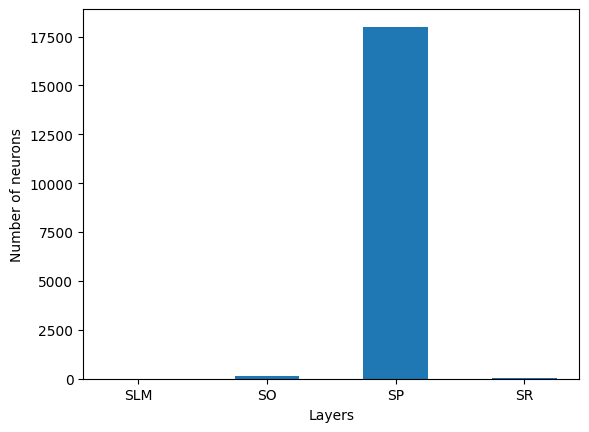

In [24]:
plt.bar(*unique_layers, width=0.5)
plt.xlabel('Layers')
plt.ylabel('Number of neurons');

Now we will query all excitatory and all inhibitory cells. We will first check the global number of cells on each class before plotting the total number of excitatory and inhibitory neurons per layer:

In [25]:
np.unique(circuit.cells.get(properties=Cell.SYNAPSE_CLASS), return_counts=True)

(array(['EXC', 'INH'], dtype=object), array([16860,  1338]))

We have 16860 excitatory neurons and 1338 inhibitory neurons in the circuit. Lets split them along the different layers:

In [26]:
layers_exc = circuit.cells.get({Cell.SYNAPSE_CLASS: 'EXC'}, properties=Cell.LAYER)
layers_inh = circuit.cells.get({Cell.SYNAPSE_CLASS: 'INH'}, properties=Cell.LAYER)

In [27]:
counter_exc = {'SLM': 0, 'SO': 0, 'SP': 0, 'SR': 0}
counter_exc.update(dict(zip(*np.unique(layers_exc, return_counts=True))))
counter_inh = {'SLM': 0, 'SO': 0, 'SP': 0, 'SR': 0}
counter_inh.update(dict(zip(*np.unique(layers_inh, return_counts=True))))
print(f"Distribution of excitatory neurons per layers : {counter_exc}")
print(f"Distribution of inhibitory neurons per layers : {counter_inh}")

Distribution of excitatory neurons per layers : {'SLM': 0, 'SO': 0, 'SP': 16860, 'SR': 0}
Distribution of inhibitory neurons per layers : {'SLM': 3, 'SO': 160, 'SP': 1142, 'SR': 33}


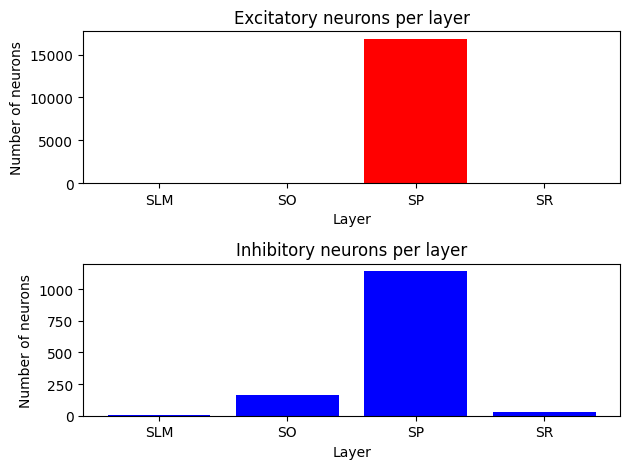

In [28]:
fig, axs = plt.subplots(2)
axs[0].bar(counter_exc.keys(), counter_exc.values(), color='r')
axs[1].bar(counter_inh.keys(), counter_inh.values(), color='b')
for ax in axs:
    ax.set_xlabel('Layer')
    ax.set_ylabel('Number of neurons')
axs[0].set_title('Excitatory neurons per layer')
axs[1].set_title('Inhibitory neurons per layer')
plt.tight_layout()

In [29]:
plt.close('all')